# Evaluating the Schrodinger Equation

QWavE was developed to evaluate the Schrodinger Equation using a fourth-order finite difference discretization for simple and arbitrary potentials. 

## schrodinger_box()

The schrodinger_box.() module evaluates problems of the form:

$$[\frac{-h^{2}}{8\pi^{2}m}\nabla^{2} + V(x)]\psi(x) = E\psi(x)$$
or
$$[\frac{-1}{2m}\nabla^{2} + V(x)]\psi(x) = E\psi(x)$$ in a.u.

schrodinger_box() takes at minimum two arguments:
<br>&emsp;&emsp;    bl and m (each in atomic units)
<br>    
which will evaluate the schrodinger equation for a particle of mass m, in box with length bl. The box has an infinite potential at the boundaries and no potential within the box. schrodinger_box will return two parameters, which are the eigenvalues and wavefunctions of said particle and box.

In [12]:
from qwave import qwave
bl = 10     # bohr
m = 1      # a.u of mass
eigen,wave = qwave.schrodinger_box(bl,m)

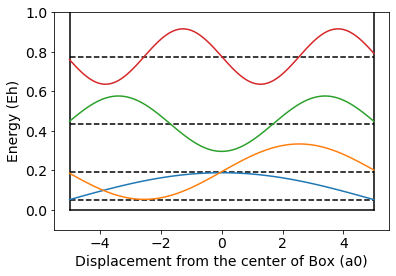

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# Create Box
plt.plot(np.linspace(1*bl/2,1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,-1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(0,0,101),color='black')

# Plot first four eigen values
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[0],eigen[0],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[1],eigen[1],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[2],eigen[2],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[3],eigen[3],101),color='black',linestyle='dashed')

# Plot the wavefunctions of the first four eigen states
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[0])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[1])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[2])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[3])
plt.ylim([-0.1,1])
plt.ylabel('Energy (Eh)',size=14)
plt.xlabel('Displacement from the center of Box (a0)',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()


schrodinger_box has a total of 7 parameters it can take:
<br>    box_length: 
<br> &emsp;&emsp;      length of box in a.u.
<br>     mass:
<br> &emsp;&emsp;        mass of particle in a.u.
<br>    pot_func:
<br> &emsp;&emsp;        evaluate the S.E. for a potential within the box:
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = 'PIAB (default) - particle in a box
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = 'PARA - particle in a parabola
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = <path to csv file> - particle in an arbitrary potential (described below)
<br>    grid_points:
<br> &emsp;&emsp;        defines the number of grid point to evaluate the S.E. (default = 101)
<br>     len_eigval:
<br> &emsp;&emsp;        defines number of eigenvalues to show (default = 10)
<br>   unit:
<br> &emsp;&emsp;        converts the final eigenvalues out of atomic units
<br> &emsp;&emsp;&emsp;&emsp;             unit = None (default) - Hartree
<br> &emsp;&emsp;&emsp;&emsp;             unit = 'eV'
<br> &emsp;&emsp;&emsp;&emsp;             unit = 'J'
<br> &emsp;&emsp;&emsp;&emsp;             unit = 'kJ/mol'
<br>    plot:
<br> &emsp;&emsp;        plots the potential and eigenstates on the potential (default = False)

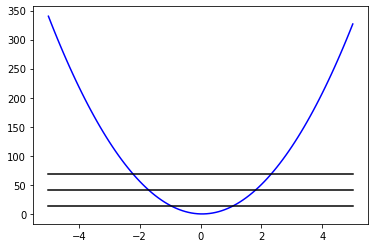

In [19]:
from qwave import qwave
bl = 10     # bohr
m = 1      # a.u of mass
eigen,wave = qwave.schrodinger_box(bl,m,
                                   pot_func='PARA',
                                   len_eigval = 3, 
                                   unit='eV',
                                   plot=True) # The plot function is only used to see if results are expected

## schrodinger_box() with an arbitrary potential

schrodinger_box() can also read the input from a csv file and evalute the schrodinger equation by interpolating between the points in the csv. The potential is confined to the box, so if your box length should be the length of the potential you provide.

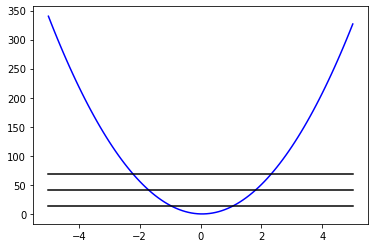

In [21]:
# First, a csv file that is representative of a quadratic function
from qwave import qwave
bl = 10     # bohr
m = 1      # a.u of mass
eigen,wave = qwave.schrodinger_box(bl,m,
                                   pot_func='./quadratic.csv',
                                   len_eigval = 3, 
                                   unit='eV',
                                   plot=True) 


As you can see, we get the same answer whether we use the predefined potential or the interpolated potential

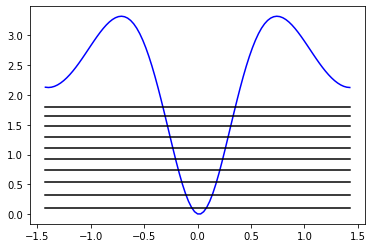

In [33]:
# Next, a csv file that is representative of an arbitarty potential
from qwave import qwave
import csv # need to do some data manipulation
from scipy import constants

bohr_to_m = constants.physical_constants['Bohr radius'][0] # convert from bohr to meter
ang_to_m = constants.physical_constants['Angstrom star'][0] # convert from angstrom to meter

au_to_kg = constants.physical_constants['atomic unit of mass'][0]  # convert from au to kg
am_to_kg = constants.physical_constants['atomic mass constant'][0] # convert from am to kg

h_to_eV = constants.physical_constants['Hartree energy in eV'][0] # convert from Eh to eV

x=[] # store data in csv
y=[]

with open('./arbitrary.csv') as csvfile:                # read csvfile
    csvreader = csv.reader( csvfile,delimiter =',')
    for row in csvreader:
        x.append(float(row[0]))
        y.append(float(row[1]))

xdata = x
ydata = np.multiply(y,1/h_to_eV)

bl = xdata[-1]-xdata[0]      # box length (centered at zerop)
m = 14 * (am_to_kg/au_to_kg) # atomic unit of mass of N atom
eigen,wave = qwave.schrodinger_box(bl,m,
                                   pot_func='./arbitrary.csv',
                                   len_eigval = 10, 
                                   unit='eV',
                                   plot=True)

As you can see, the potential is fairly harmonic near the center of the box, but dissopates as the potential flattens at ~0.75 Angstrom (yes the displacement on the x_axis is in Ang and not bohr, the x axis unit is unaffected because the Kinetic Energy operator take the second derivative of the position, which means that the position units wash away)